In [1]:
from sklearn import datasets
from sklearn import tree
import pandas as pd
import numpy as np
import seaborn as sns
import random as rnd
%matplotlib inline

iris = datasets.load_iris()

df = pd.DataFrame(data = np.c_[iris['data'],iris['target']], columns = iris['feature_names'] + ['target'])


In [5]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [6]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [7]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0
149,5.9,3.0,5.1,1.8,2.0


In [8]:
x = iris.data[:, 2:]

In [9]:
y = iris.target

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3)
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

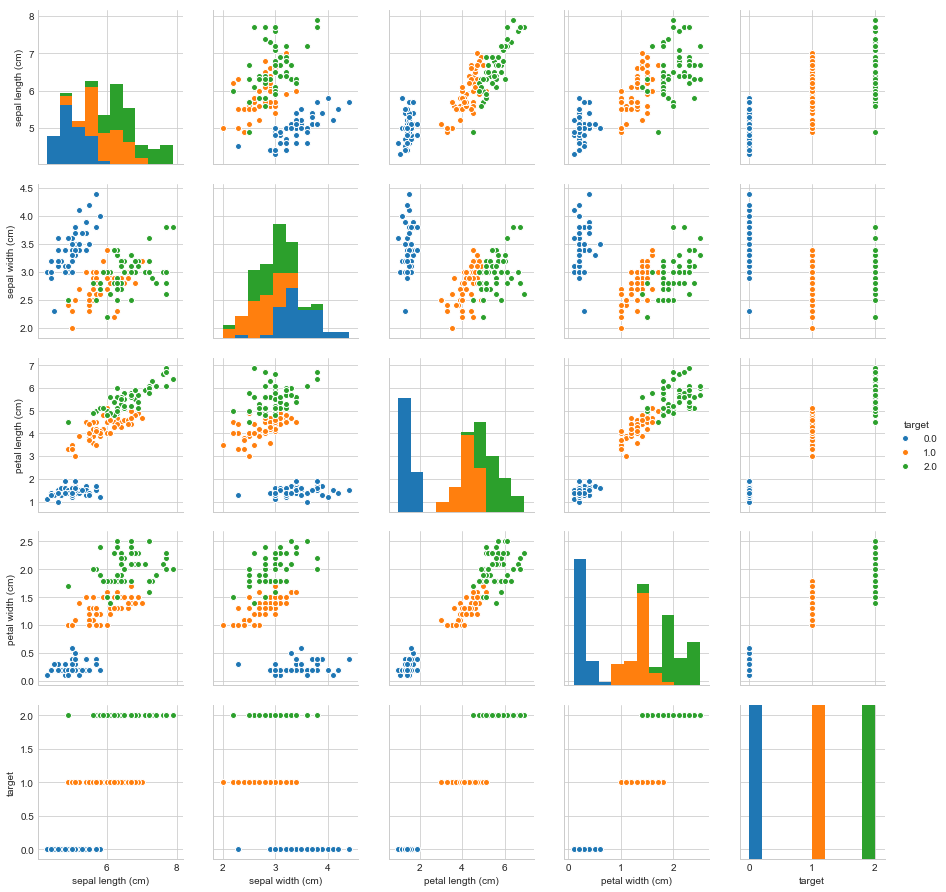

In [12]:
sns.set_style('whitegrid')
sns.pairplot(df,hue = 'target')

In [15]:
example = [128, 6.7]
dtc.predict_proba([example])

array([[0., 0., 1.]])

In [16]:
iris.target_names[dtc.predict([example])]



array(['virginica'], dtype='<U10')

In [17]:
from sklearn.metrics import confusion_matrix

In [18]:
ypred = dtc.predict(x_test)

In [19]:
ypred

array([1, 1, 1, 2, 0, 2, 0, 0, 1, 2, 1, 0, 2, 1, 0, 1, 0, 1, 1, 1, 2, 0,
       1, 1, 2, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 2, 1, 0, 1, 1, 2, 1,
       1])

In [20]:
confusion_matrix(ypred, y_test, )

array([[14,  0,  0],
       [ 0, 21,  2],
       [ 0,  0,  8]], dtype=int64)

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
print(accuracy_score(y_test, ypred))

0.9555555555555556


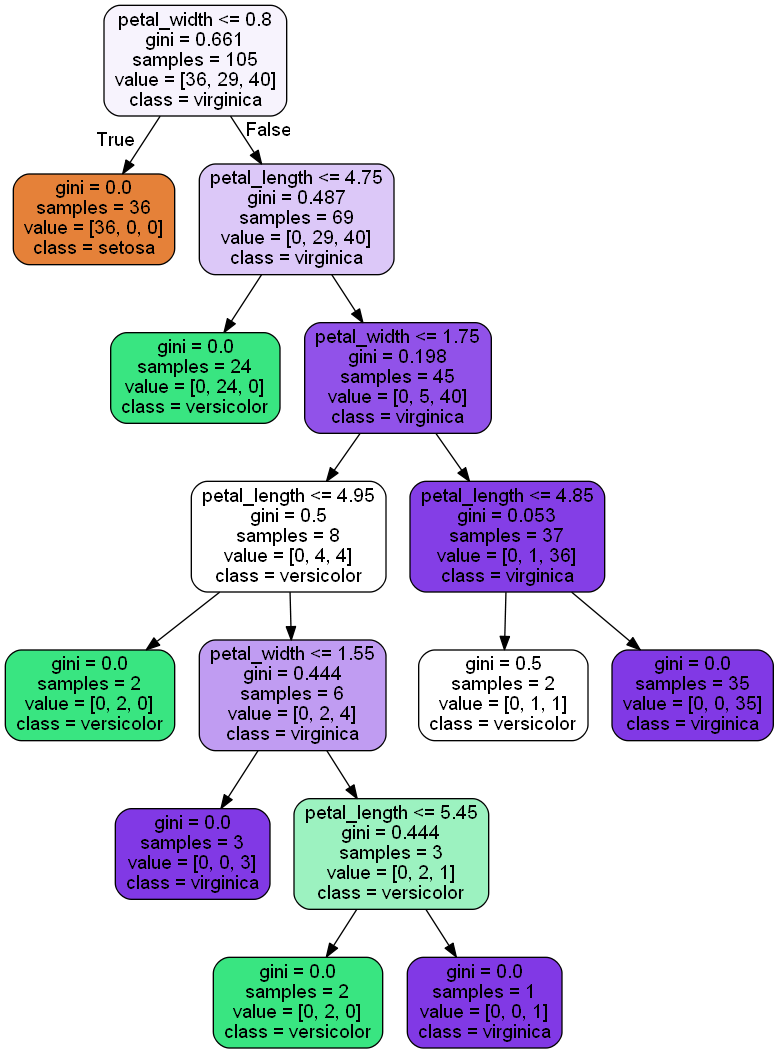

In [25]:
from IPython.display import Image, display
import numpy as np, pandas as pd, matplotlib.pyplot as plt, pydotplus
dot_data = tree.export_graphviz(dtc, out_file=None, filled=True, rounded=True,
                               feature_names = ['petal_length','petal_width'],
                               class_names=['setosa','versicolor','virginica'])

graph = pydotplus.graph_from_dot_data(dot_data)
display(Image(graph.create_png()))